In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from random import gauss

# Load data into DataFrame

In [2]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Explore data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [5]:
df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [6]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


#### calculate row counts per version

In [7]:
# print total counts for each column
print('control version total counts')
print(df[df['version'] == 'gate_30'].count())
print('---')
print('test version total counts')
print(df[df['version'] == 'gate_40'].count())

control version total counts
userid            44700
version           44700
sum_gamerounds    44700
retention_1       44700
retention_7       44700
dtype: int64
---
test version total counts
userid            45489
version           45489
sum_gamerounds    45489
retention_1       45489
retention_7       45489
dtype: int64


In [8]:
# print unique counts for each column
print('control version unique counts')
print(df[df['version'] == 'gate_30'].nunique())
print('---')
print('test version unique counts')
print(df[df['version'] == 'gate_40'].nunique())

control version unique counts
userid            44700
version               1
sum_gamerounds      779
retention_1           2
retention_7           2
dtype: int64
---
test version unique counts
userid            45489
version               1
sum_gamerounds      792
retention_1           2
retention_7           2
dtype: int64


### calculate version distribution

In [9]:
# count number of users
control_num_users = df[df['version'] == 'gate_30']['userid'].nunique()
test_num_users = df[df['version'] == 'gate_40']['userid'].nunique()
total_num_users = df['userid'].nunique()

# calculate version distribution
control_dist = control_num_users / total_num_users
test_dist = test_num_users / total_num_users

# print data
print('total users:', total_num_users)
print('control users:', control_num_users, f', {control_dist*100:.2f}%')
print('test users:', test_num_users, f', {test_dist*100:.2f}%')

total users: 90189
control users: 44700 , 49.56%
test users: 45489 , 50.44%


# Results Analysis

    note on calculating retention rates:
    
    since retention is represented as TRUE (1) or FALSE (0)
    retention rate is equal to the ratio of the number of TRUEs
    to the total number of values in the retention column
    
    this is the same as taking the mean of the retention column

### compare day 7 retention rates

In [10]:
# calculate day 7 retention rates
control_ret7 = df[df['version'] == 'gate_30']['retention_7'].mean()
test_ret7 = df[df['version'] == 'gate_40']['retention_7'].mean()
delta_ret7 = control_ret7 - test_ret7

# print results
print('day 7 control retention rate:\t', f'{control_ret7*100:.2f}%')
print('day 7 test retention rate:\t', f'{test_ret7*100:.2f}%')
print('delta:\t', f'{delta_ret7*100:.2f}%')

day 7 control retention rate:	 19.02%
day 7 test retention rate:	 18.20%
delta:	 0.82%


### compare day 1 retention rates

In [11]:
# calculate day 1 retention rates
control_ret1 = df[df['version'] == 'gate_30']['retention_1'].mean()
test_ret1 = df[df['version'] == 'gate_40']['retention_1'].mean()
delta_ret1 = control_ret1 - test_ret1

# print results
print('day 1 control retention rate:\t', f'{control_ret1*100:.2f}%')
print('day 1 test retention rate:\t', f'{test_ret1*100:.2f}%')
print('delta:\t', f'{delta_ret1*100:.2f}%')

day 1 control retention rate:	 44.82%
day 1 test retention rate:	 44.23%
delta:	 0.59%


### compare  game rounds played

In [12]:
print('gamerounds played mean')
print('control:',df[df['version'] == 'gate_30']['sum_gamerounds'].mean(), df[df['version'] == 'gate_30']['sum_gamerounds'].std())
print('test:',df[df['version'] == 'gate_40']['sum_gamerounds'].mean(), df[df['version'] == 'gate_40']['sum_gamerounds'].std())

gamerounds played mean
control: 52.45626398210291 256.71642311604455
test: 51.29877552814966 103.29441621653784


### calculate day 7 t-statistics

In [13]:
# calculate t-value and p-value using scipy.stats ttest_ind function
t_val, p_val = st.ttest_ind(df[df['version'] == 'gate_30']['retention_7'],
                            df[df['version'] == 'gate_40']['retention_7'])

# print results
print('t-value: ', f'{t_val:.6f}')
print('p-value: ', f'{p_val:.6f}')

t-value:  3.164499
p-value:  0.001554


### calculate day 1 t-statistics

In [14]:
# calculate t-value and p-value using scipy.stats ttest_ind function
t_val, p_val = st.ttest_ind(df[df['version'] == 'gate_30']['retention_1'],
                            df[df['version'] == 'gate_40']['retention_1'])

# print results
print('t-value: ', f'{t_val:.6f}')
print('p-value: ', f'{p_val:.6f}')

t-value:  1.784098
p-value:  0.074411


### calculate game rounds played t-statistics

In [15]:
# calculate t-value and p-value using scipy.stats ttest_ind function
t_val, p_val = st.ttest_ind(df[df['version'] == 'gate_30']['sum_gamerounds'],
                            df[df['version'] == 'gate_40']['sum_gamerounds'])

# print results
print('t-value: ', f'{t_val:.6f}')
print('p-value: ', f'{p_val:.6f}')

t-value:  0.891043
p-value:  0.372909


### Game rounds played distribution (boxplot)

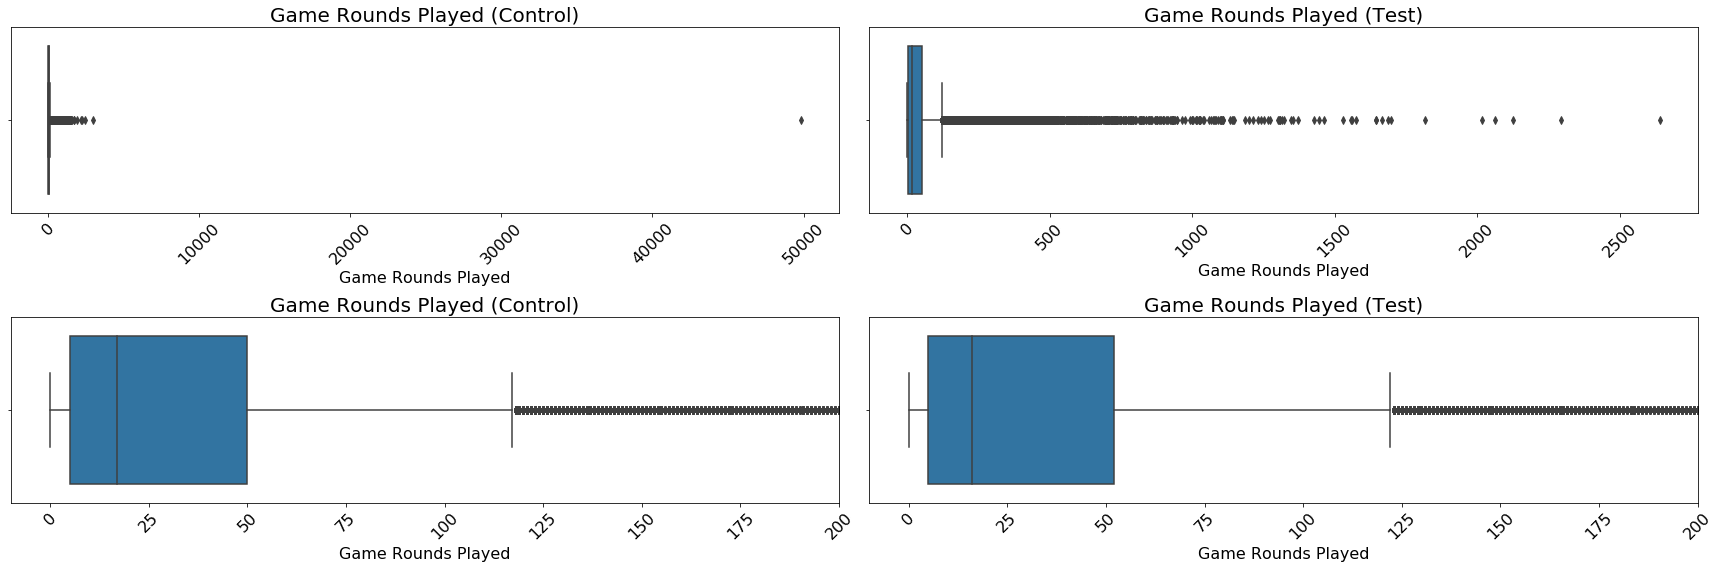

In [16]:
# set figure size
plt.rcParams["figure.figsize"] = (24,8)

# plot control rounds played data with no view manipulation
plt.subplot(2,2,1)
sns.boxplot(df[df['version'] == 'gate_30']['sum_gamerounds'])
plt.title('Game Rounds Played (Control)', fontsize=20)
plt.xlabel('Game Rounds Played', fontsize=16)
plt.xticks(fontsize=16, rotation=45)

# plot test rounds played data with no view manipulation
plt.subplot(2,2,2)
sns.boxplot(df[df['version'] == 'gate_40']['sum_gamerounds'])
plt.title('Game Rounds Played (Test)', fontsize=20)
plt.xlabel('Game Rounds Played', fontsize=16)
plt.xticks(fontsize=16, rotation=45)

# plot control rounds played data zooomed in to IQR max limit
plt.subplot(2,2,3)
sns.boxplot(df[df['version'] == 'gate_30']['sum_gamerounds'])
plt.title('Game Rounds Played (Control)', fontsize=20)
plt.xlabel('Game Rounds Played', fontsize=16)
plt.xticks(np.arange(0,201,25), fontsize=16, rotation=45)
plt.xlim(-10,200)

# plot test rounds played data zooomed in to IQR max limit
plt.subplot(2,2,4)
sns.boxplot(df[df['version'] == 'gate_40']['sum_gamerounds'])
plt.title('Game Rounds Played (Test)', fontsize=20)
plt.xlabel('Game Rounds Played', fontsize=16)
plt.xticks(np.arange(0,201,25), fontsize=16, rotation=45)
plt.xlim(-10,200)

plt.tight_layout()
plt.show()


As seen above, we can filter game rounds played of ~125 or greater as outlier points.

### Game rounds played distribution (distplot)

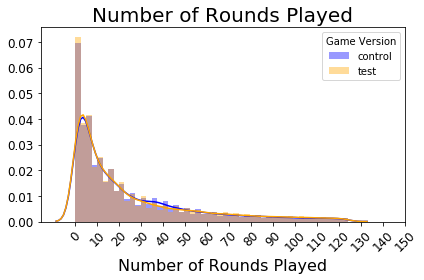

In [17]:
# set figure size
plt.rcParams["figure.figsize"] = (6,4)

# plot control version's game rounds played as a distribution plot
sns.distplot(df[(df['version'] == 'gate_30') & (df['sum_gamerounds'] < 125)]['sum_gamerounds'],label='control', color='blue')

# plot test version's game rounds played as a distribution plot
sns.distplot(df[(df['version'] == 'gate_40') & (df['sum_gamerounds'] < 125)]['sum_gamerounds'],label='test', color='orange')

# plot title
plt.title('Number of Rounds Played', fontsize=20)

# axis ticks and labels
plt.xticks(np.arange(0,151,10),fontsize=12,rotation=45)
plt.xlabel('Number of Rounds Played', fontsize=16)
plt.yticks(fontsize=12)

# plot legend
plt.legend(title='Game Version', loc=0)

plt.tight_layout()
plt.savefig('game_rounds_played_dist')
plt.show()

#### Calculate game rounds played statistics

In [18]:
# print control version's mean and stdev
print('control version:')
print('game rounds played mean:\t',df[(df['version'] == 'gate_30') & (df['sum_gamerounds'] < 125)]['sum_gamerounds'].mean())
print('game rounds played stdev:\t',df[(df['version'] == 'gate_30') & (df['sum_gamerounds'] < 125)]['sum_gamerounds'].std())

print('---')

# print test version's mean and stdev
print('test version:')
print('game rounds played mean:\t',df[(df['version'] == 'gate_40') & (df['sum_gamerounds'] < 125)]['sum_gamerounds'].mean())
print('game rounds played stdev:\t',df[(df['version'] == 'gate_40') & (df['sum_gamerounds'] < 125)]['sum_gamerounds'].std())

control version:
game rounds played mean:	 24.39795585243967
game rounds played stdev:	 27.897741715196283
---
test version:
game rounds played mean:	 24.480957428451696
game rounds played stdev:	 28.550063473326297


# Bootstrapping

### calculate probability of control day 7 retention rate > test

In [19]:
# define various sampling rates
frac = [0.10, 0.25, 0.50, 0.75, 1.0]

print('probability control Day 7 retention rate > test day 7 retention rate: ')

# loop through the sampling rates
for f in frac:
    
    # empty list for each sampling rate
    ret_rates = []
    
    # resample 1000 times, calculating retention rates each iteration
    for num in range(1000):
        ret_rate = df.sample(frac=f, replace=True).groupby('version')['retention_7'].mean()
        ret_rates.append(ret_rate)
    
    # convert list to DataFrame
    df_ret_rates = pd.DataFrame(ret_rates)
    
    # add column checking control day 7 retention rate > test day 7 retention rate
    df_ret_rates['g30_gt_g40'] = (df_ret_rates['gate_30'] > df_ret_rates['gate_40'])
    
    # add column calculating difference between retention rates
    df_ret_rates['dif'] = df_ret_rates['gate_30'] - df_ret_rates['gate_40']
    
    # calculating mean equivalent to determining ratio of TRUE to population
    print(f'{f*100:.0f}% sampling rate: ',
          f'prob: {df_ret_rates.g30_gt_g40.mean()*100:.2f}%',
          f'diff mean: {df_ret_rates.dif.mean()*100:.4f}%')


probability control Day 7 retention rate > test day 7 retention rate: 
10% sampling rate:  prob: 83.10% diff mean: 0.8419%
25% sampling rate:  prob: 93.40% diff mean: 0.8174%
50% sampling rate:  prob: 98.90% diff mean: 0.8352%
75% sampling rate:  prob: 99.80% diff mean: 0.8221%
100% sampling rate:  prob: 100.00% diff mean: 0.8113%


# Generate mock historical data
    This is for the research proposal portion of the assignment
    

#### Generate mock data by resampling A/B test data and calculating retention rates for each sample
 - since this is supposed to be historical data, use control version of the game (gate_30)
 - simulating retention rates by day  for 6 months, so generating 180 days worth of data

In [20]:
# initialize empty lists
mock_ret1 = []
mock_ret7 = []

# loop 180 times (for 180 days, or 6 months)
for i in range(180):
    # calculate retention rates for 5000 samples
    mock_data1 = df.sample(n = 5000, replace = True).groupby('version')['retention_1'].mean()
    mock_data7 = df.sample(n = 5000, replace = True).groupby('version')['retention_7'].mean()
    
    # append retention rates to lists
    mock_ret1.append(mock_data1)
    mock_ret7.append(mock_data7)

# convert lists to Data Frame
mock_ret1 = pd.DataFrame(mock_ret1)
mock_ret7 = pd.DataFrame(mock_ret7)

print(mock_ret7.head())
print('---')
print('mean:\t',mock_ret7['gate_30'].mean())
print('stdev:\t',mock_ret7['gate_30'].std())



version       gate_30   gate_40
retention_7  0.179219  0.183155
retention_7  0.193523  0.190876
retention_7  0.185425  0.182609
retention_7  0.196879  0.176729
retention_7  0.184497  0.179152
---
mean:	 0.18959285115469543
stdev:	 0.007502087169879341


#### Plot mock data as distribution plots

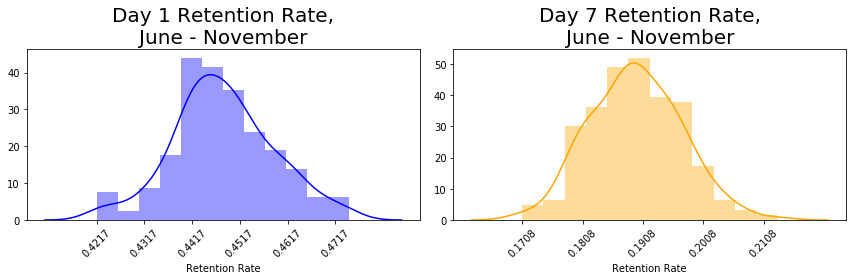

In [21]:
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot day 1 retention data
plt.subplot(1,2,1)
sns.distplot(mock_ret1['gate_30'],hist=True, label='day1', color='blue')
plt.xlabel('Retention Rate')
plt.xticks(np.arange(round(mock_ret1['gate_30'].min(),4),mock_ret1['gate_30'].max(), 0.01), rotation=45)
plt.title('Day 1 Retention Rate,\nJune - November', fontsize=20)

# plot day 7 retention data
plt.subplot(1,2,2)
sns.distplot(mock_ret7['gate_30'],hist=True, label='day7', color='orange')
plt.xlabel('Retention Rate')
plt.xticks(np.arange(round(mock_ret7['gate_30'].min(),4),mock_ret7['gate_30'].max(), 0.01), rotation=45)
plt.title('Day 7 Retention Rate,\nJune - November', fontsize=20)

plt.tight_layout()
plt.savefig('mock_historical_retention_rates')
plt.show()

#### Plot mock historical data over time

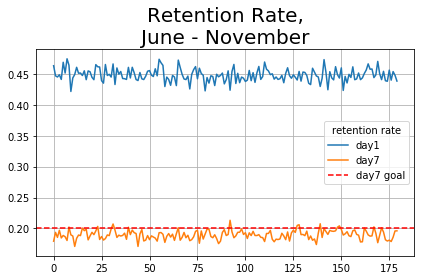

In [22]:
# set figure size
plt.rcParams["figure.figsize"] = (6,4)

# reset indexes
mock_ret1_ = mock_ret1.reset_index()
mock_ret7_ = mock_ret7.reset_index()
#mock_ret1_.columns = ['retention','gate_30','gate_40']
#mock_ret7_.columns = ['retention','gate_30','gate_40']

# plot day 1 retention data
sns.lineplot(data=mock_ret1_['gate_30'], label='day1')

# plot day 7 retention data
sns.lineplot(data=mock_ret7_['gate_30'], label='day7')

# plot horizontal line to represent day 7 goal
plt.axhline(0.20, ls='--', color='red', label='day7 goal')

# enable grid lines
plt.grid()

# plot title
plt.title('Retention Rate,\nJune - November', fontsize=20)

# plot legend
plt.legend(title='retention rate', loc=0)

plt.tight_layout()
plt.savefig('mock_historical_retention_rates_line')
plt.show()

#### Plot projected results

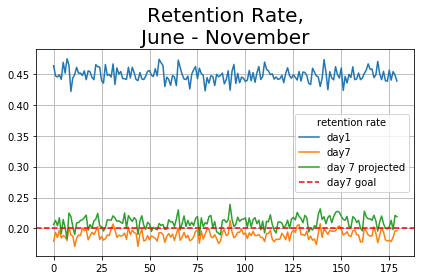

In [23]:
# set figure size
plt.rcParams["figure.figsize"] = (6,4)

# add a random value from a normal distribution centered at 0.02 to the mock data
# this will represent the 2% projected improvement in retention rate
mock_ret7_['projected'] = mock_ret7_['gate_30'].apply(lambda x: x+gauss(0.02, 0.005))

# plot day 1 retention data
sns.lineplot(data=mock_ret1_['gate_30'], label='day1')

# plot day 7 retention data
sns.lineplot(data=mock_ret7_['gate_30'], label='day7')

# plot day 7 retention projected data
sns.lineplot(data=mock_ret7_['projected'], label='day 7 projected')

# plot horizontal line to represent day 7 goal
plt.axhline(0.20, ls='--', color='red', label='day7 goal')

# enable grid lines
plt.grid()

# plot title
plt.title('Retention Rate,\nJune - November', fontsize=20)

# plot legend
plt.legend(title='retention rate', loc=0)

plt.tight_layout()
plt.savefig('mock_historical_retention_rates_proj')
plt.show()